In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cv2  #OPENCV
from PIL import Image #PILLOW
import tensorflow as tf
tf.random.set_seed(3)
from tensorflow import keras
from keras.datasets import mnist
from tensorflow.math import confusion_matrix

In [2]:
#Loading the MNIST data from keras.dataset

#image processing and train_test split has been taken care by mnist

In [3]:
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

In [4]:
type(X_train)

numpy.ndarray

In [5]:
print(X_train.shape, Y_train.shape, X_test.shape, Y_test.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


In [6]:
print(X_train[10])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  42 118 219 166 118 118   6
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 103 242 254 254 254 254 254  66
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0  18 232 254 254 254 254 254 238
   70   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 104 244 254 224 254 254 254
  141   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0 207 254 210 25

In [7]:
print(X_train[10].shape)

(28, 28)


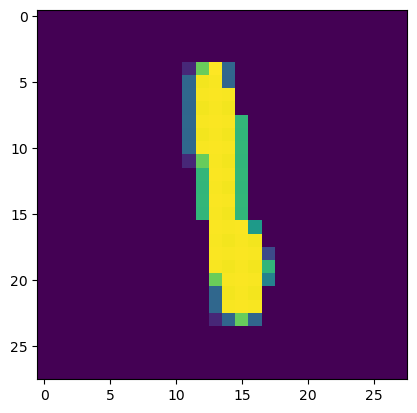

1


In [8]:
#displaying the image
plt.imshow(X_train[200])
plt.show()

#print the corresponding label
print(Y_train[200])

In [9]:
print(Y_train.shape, Y_test.shape)

(60000,) (10000,)


In [10]:
#unique values in Y_train
print(np.unique(Y_train))

#unique values in Y_test
print(np.unique(Y_test))

[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9]


In [11]:
#We can use these labels or we can apply One Hot Encoding

#All the images have same dimensions. If not, we have resize all the images to the same dimensions

In [12]:
#let us normalize the value of pixels now

X_train = X_train/255
X_test = X_test/255

In [13]:
print(X_train[10])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

In [14]:
#Building a neural network

In [125]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28),),
    keras.layers.Dense(units=50, activation="relu"),
    keras.layers.Dense(units=30, activation="relu"),
    keras.layers.Dense(units=20, activation="relu"),
    keras.layers.Dense(units=10, activation="sigmoid")
])

In [126]:
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=['accuracy'])

In [127]:
model.fit(X_train, Y_train, epochs=15)

Epoch 1/15
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3283 - accuracy: 0.9020
Epoch 2/15
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1435 - accuracy: 0.9563
Epoch 3/15
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1084 - accuracy: 0.9667
Epoch 4/15
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0874 - accuracy: 0.9732
Epoch 5/15
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0750 - accuracy: 0.9768
Epoch 6/15
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0649 - accuracy: 0.9802
Epoch 7/15
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0581 - accuracy: 0.9817
Epoch 8/15
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0511 - accuracy: 0.9840
Epoch 9/15
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0455 - accuracy: 0.9851
Epoch 10/15
1875/1875 [==============================] - 2s 1ms/step - loss: 0.041

In [128]:
#Training data accuracy = 99.12

In [129]:
#Accuracy on test data:

loss, accuracy = model.evaluate(X_test, Y_test)
print(accuracy)

313/313 [==============================] - 0s 978us/step - loss: 0.1159 - accuracy: 0.9732
0.9732000231742859


In [130]:
#Test data accuracy = 97.3%

In [131]:
print(X_test.shape)

(10000, 28, 28)


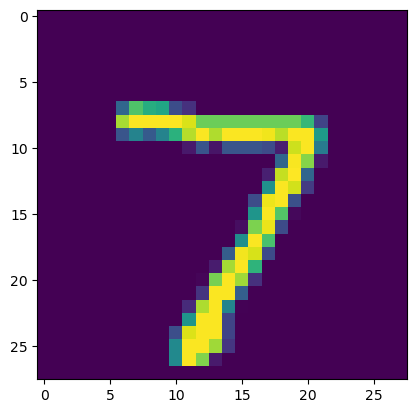

In [132]:
#first data point in X_test

plt.imshow(X_test[0])


In [133]:
print(Y_test[0])

7


In [134]:
Y_pred = model.predict(X_test)

313/313 [==============================] - 0s 855us/step


In [135]:
print(Y_pred.shape)

(10000, 10)


In [136]:
print(Y_pred[0])

#will give us 10 values with each value giving u the probability that it is that number(index)

[7.1429997e-04 4.6251927e-02 9.2327818e-03 1.0230449e-01 3.5458015e-06
 4.5195627e-03 1.5363921e-09 9.9999988e-01 1.3889468e-04 3.4242448e-01]


In [137]:
#model.predict() gives the prediction probabilty of each class for that data point

In [138]:
# converting the prediction probabilities to class labels

label_for_first_image = np.argmax(Y_pred[0]) #highest prob is the detected number
print(label_for_first_image)

7


In [139]:
Y_pred_labels = [np.argmax(i) for i in Y_pred]
print(Y_pred_labels)

[7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 8, 4, 9, 6, 6, 5, 4, 0, 7, 4, 0, 1, 3, 1, 3, 4, 7, 2, 7, 1, 2, 1, 1, 7, 4, 2, 3, 5, 1, 2, 4, 4, 6, 3, 5, 5, 6, 0, 4, 1, 9, 5, 7, 8, 9, 3, 7, 4, 6, 4, 3, 0, 7, 0, 2, 9, 1, 7, 3, 2, 9, 7, 7, 6, 2, 7, 8, 4, 7, 3, 6, 1, 3, 6, 9, 3, 1, 4, 1, 7, 6, 9, 6, 0, 5, 4, 9, 9, 2, 1, 9, 4, 8, 7, 3, 9, 7, 4, 4, 4, 9, 2, 5, 4, 7, 6, 7, 9, 0, 5, 8, 5, 6, 6, 5, 7, 8, 1, 0, 1, 6, 4, 6, 7, 3, 1, 7, 1, 8, 2, 0, 4, 9, 8, 5, 5, 1, 5, 6, 0, 3, 4, 4, 6, 5, 4, 6, 5, 4, 5, 1, 4, 4, 7, 2, 3, 2, 7, 1, 8, 1, 8, 1, 8, 5, 0, 8, 9, 2, 5, 0, 1, 1, 1, 0, 9, 0, 3, 1, 6, 4, 2, 3, 6, 1, 1, 1, 3, 9, 5, 2, 9, 4, 5, 9, 3, 9, 0, 3, 6, 5, 5, 7, 2, 2, 7, 1, 2, 8, 4, 1, 7, 3, 3, 8, 8, 7, 9, 2, 2, 4, 1, 5, 9, 8, 7, 2, 3, 0, 2, 4, 2, 4, 1, 9, 5, 7, 7, 2, 8, 2, 6, 8, 5, 7, 7, 9, 1, 8, 1, 8, 0, 3, 0, 1, 9, 9, 4, 1, 8, 2, 1, 2, 9, 7, 5, 9, 2, 6, 4, 1, 5, 8, 2, 9, 2, 0, 4, 0, 0, 2, 8, 4, 7, 1, 2, 4, 0, 2, 7, 4, 3, 3, 0, 0, 3, 1, 9, 6, 5, 2, 5, 8, 7, 9, 3, 0, 4, 2, 0, 7, 1, 1, 2, 1, 

In [140]:
#Y_test is true labels
#T_pred_labels is predicted values

In [141]:
#Confusion Matrix

In [142]:
conf_mat = confusion_matrix(Y_test, Y_pred_labels)

In [143]:
print(conf_mat)

tf.Tensor(
[[ 969    1    1    2    1    4    0    2    0    0]
 [   0 1120    2    5    0    0    2    1    5    0]
 [   3    1 1009    6    2    0    1    3    7    0]
 [   0    0    3  991    0    5    0    4    6    1]
 [   3    0    5    0  955    1    3    4    2    9]
 [   4    0    0    9    0  864    2    2    9    2]
 [  10    3    2    0    7    5  929    0    2    0]
 [   2    8    6    7    0    0    0  997    2    6]
 [   8    1    2    8    6    2    2    3  936    6]
 [   4    3    2    5   12    5    0    7    9  962]], shape=(10, 10), dtype=int32)


Text(0.5, 1.0, 'Confusion Matrix')

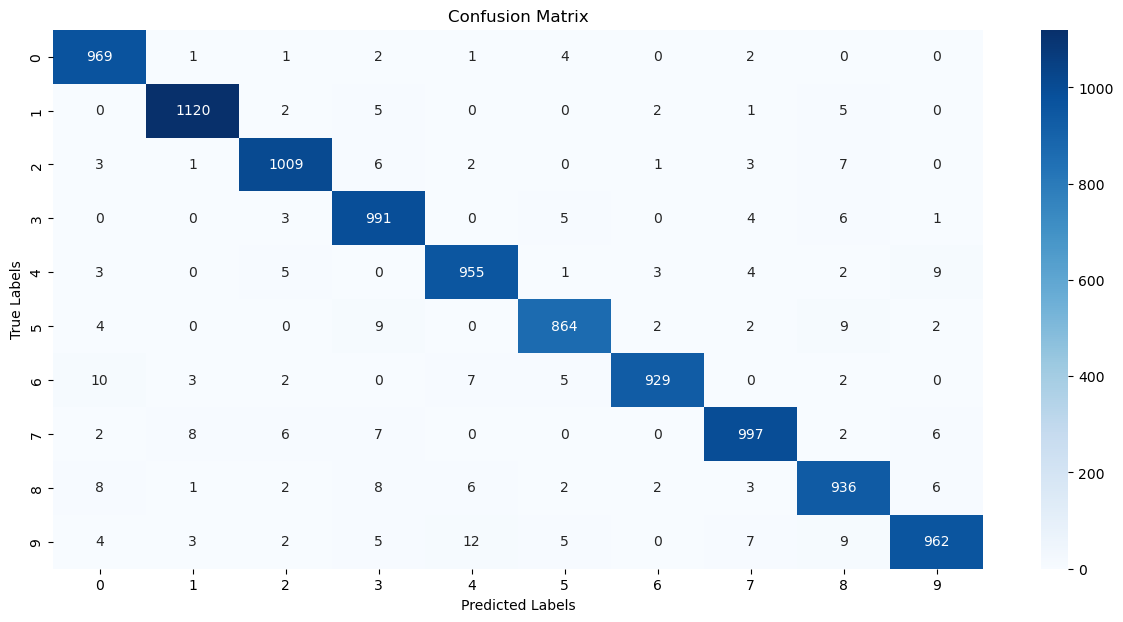

In [144]:
plt.figure(figsize=(15,7))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')
plt.ylabel('True Labels')
plt.xlabel('Predicted Labels')
plt.title("Confusion Matrix")

In [145]:
#Building the predictive system

input_image_path = './WIN_20230609_23_35_18_Pro.jpg'

input_image = cv2.imread(input_image_path)

In [146]:
type(input_image)

numpy.ndarray

In [147]:
print(input_image)

[[[121 118 127]
  [122 119 128]
  [122 119 128]
  ...
  [136 134 134]
  [135 133 133]
  [133 131 131]]

 [[122 119 128]
  [122 119 128]
  [122 119 128]
  ...
  [136 134 134]
  [135 133 133]
  [133 131 131]]

 [[120 119 128]
  [120 119 128]
  [119 118 127]
  ...
  [136 134 134]
  [136 134 134]
  [135 133 133]]

 ...

 [[108 117 120]
  [107 116 119]
  [107 114 117]
  ...
  [100 103 108]
  [100 102 110]
  [100 102 110]]

 [[108 117 120]
  [106 115 118]
  [106 113 116]
  ...
  [100 103 111]
  [100 102 112]
  [100 102 112]]

 [[106 115 118]
  [104 113 116]
  [104 111 114]
  ...
  [100 103 111]
  [100 102 112]
  [ 99 101 111]]]


In [148]:
cv2.imshow('Digit', input_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [149]:
input_image.shape

(720, 1280, 3)

In [150]:
grayscale = cv2.cvtColor(input_image, cv2.COLOR_RGB2GRAY)

In [151]:
grayscale.shape

(720, 1280)

In [152]:
input_image_resize = cv2.resize(grayscale, (28,28))

In [153]:
cv2.imshow('Resized image', input_image_resize)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [154]:
input_image_resize = input_image_resize/255

In [155]:
type(input_image_resize)

numpy.ndarray

In [156]:
image_reshaped = np.reshape(input_image_resize, [1, 28, 28])

In [157]:
input_prediction = model.predict(image_reshaped)
print(input_prediction)

1/1 [==============================] - 0s 14ms/step
[[5.8095554e-07 8.4647740e-16 9.9999994e-01 9.9998295e-01 1.9957612e-21
  1.0750943e-02 9.4076507e-02 8.8151110e-06 4.6174020e-02 4.5109235e-08]]


In [158]:
input_pred_label = np.argmax(input_prediction)

In [159]:
print(input_pred_label)

2


In [109]:
#Predictive System

input_image_path = input("Path of the image to be predicted: ")
cv2.imshow('Image', input_image)
cv2.waitKey(0)
cv2.destroyAllWindows()
grayscale = cv2.cvtColor(input_image, cv2.COLOR_RGB2GRAY)
input_image_resize = cv2.resize(grayscale, (28,28))
input_image_resize = input_image_resize/255
image_reshaped = np.reshape(input_image_resize, [1,28,28])
input_prediction = model.predict(image_reshaped)
input_pred_laebl = np.argmax(input_prediction)
print("The Handwritten Digit is recognized as: ", input_pred_label)

Path of the image to be predicted: WIN_20230609_23_32_54_Pro.jpg
1/1 [==============================] - 0s 19ms/step
The Handwritten Digit is recognized as:  5
